In [13]:
# Preamble
from model import FractionMLP
from training_defs import load_csv, test_train_split
import matplotlib.pyplot as plt
import torch

In [14]:
# Variables
input_size = 210 # 400-2490 nm (10 nm intervals)
hidden_size = 16 # Arbitrary
output_size = 3 # GV, NPV, soil

In [15]:
# NN setup
model = FractionMLP(input_size, hidden_size, output_size)
print(model.W1.dtype)

torch.float64


In [16]:
# This is my personal filepath. Change filepath for testing
#raw_data = load_csv('filepath')
raw_data = load_csv("/Users/galacticmilk/Desktop/Michael's folder/[UNI]/[UTAT]/[science]/FINCH-Science_SyntheticData/data/simpler_data_rwc.csv")

In [17]:
train_input, train_output, test_input, test_output = test_train_split(raw_data)
print(train_input.dtype)

torch.float64


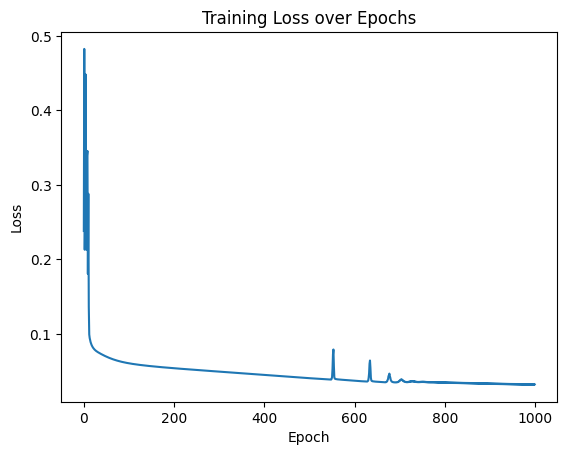

In [18]:
#Train the model, store loss
losses = model.train(train_input, train_output, epochs=1000, lr=0.1)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

# with torch.no_grad():
#     output = model.forward(test_input)
#     # output = (output > 0.5).float() 
# accuracy = torch.mean((output == test_output).float())
# print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")